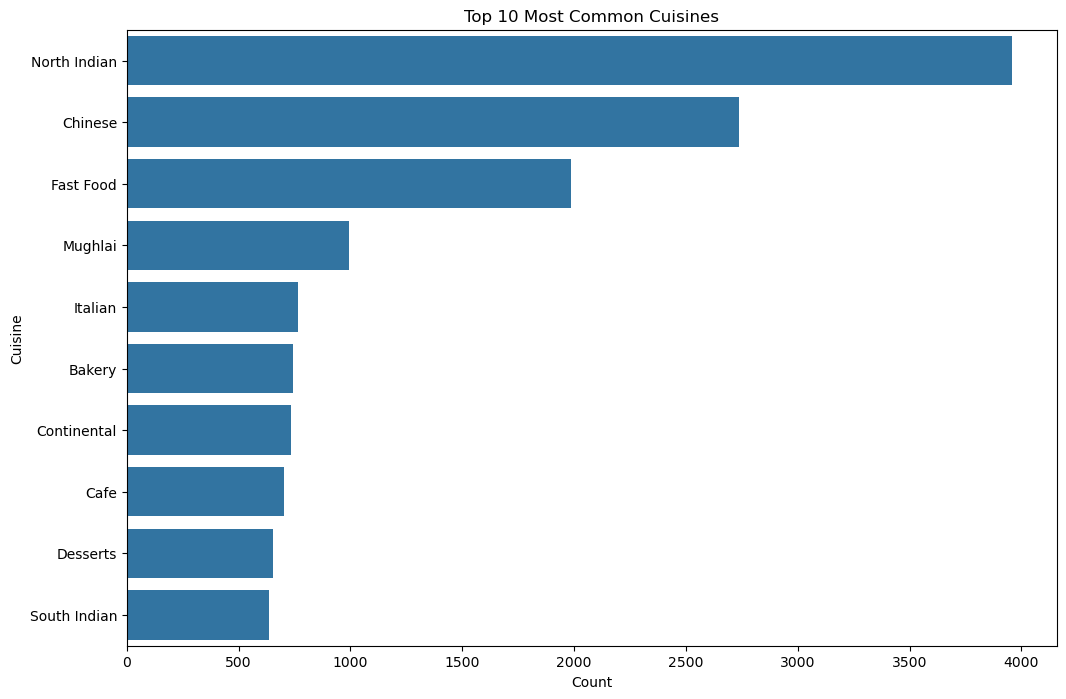

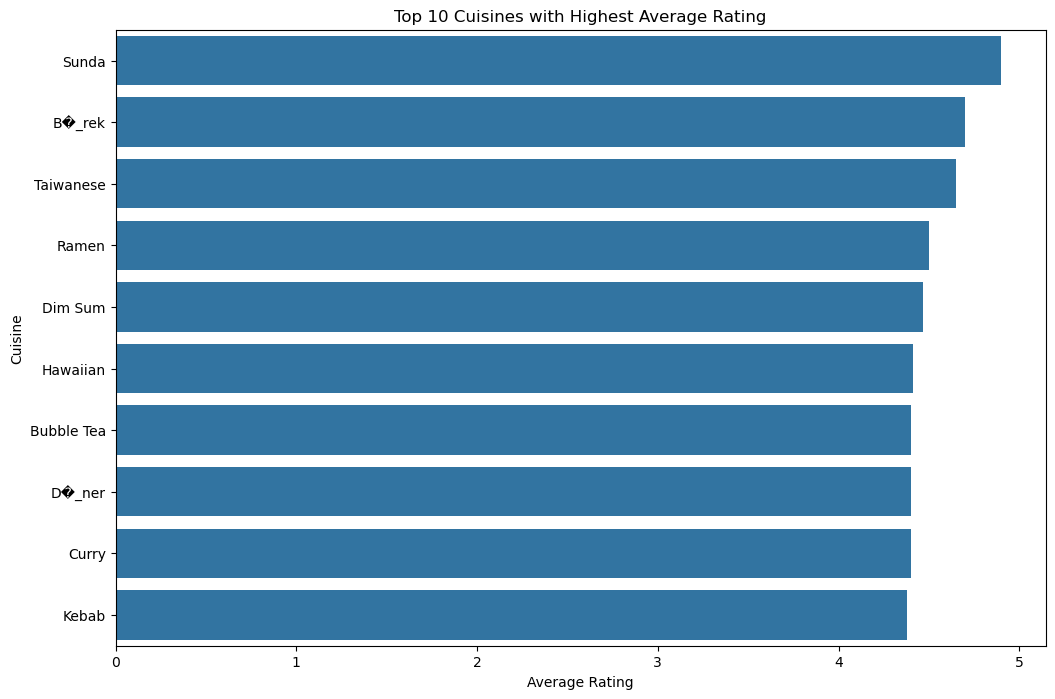

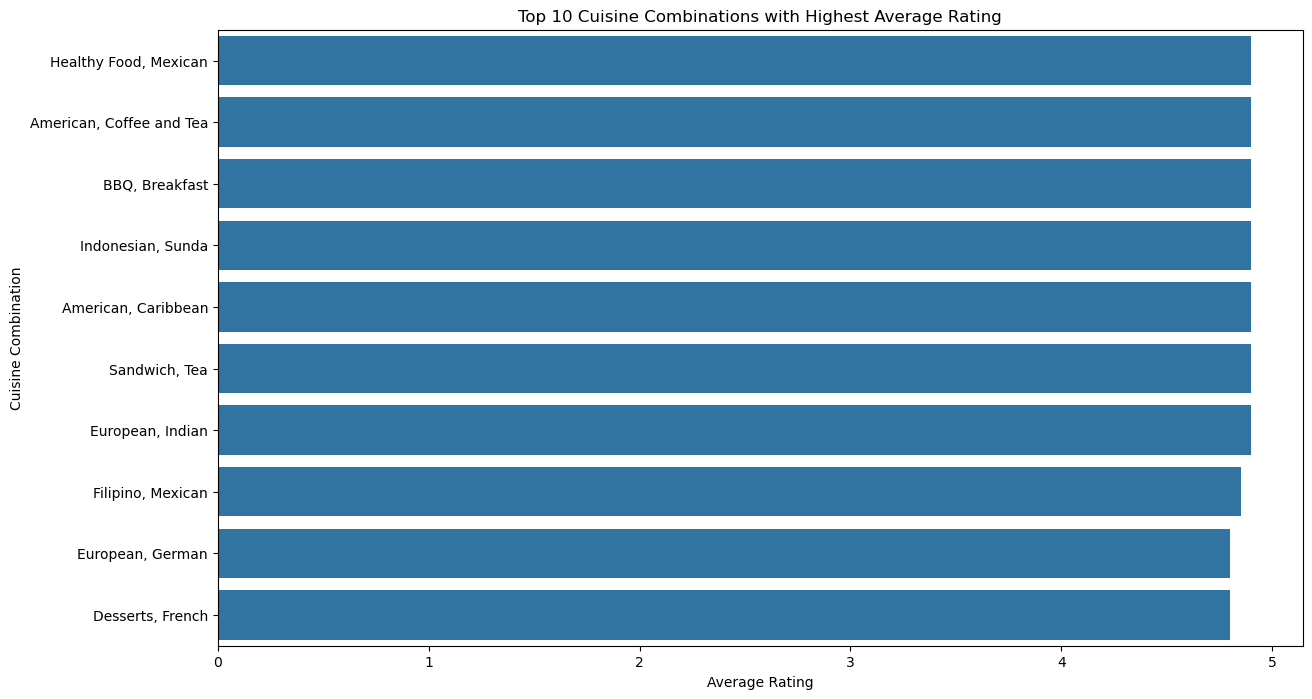

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
full_file_path = r"C:\Users\Sweth\OneDrive\Desktop\DA inten\Dataset  (1).csv"
data = pd.read_csv(full_file_path)
data = data.dropna(subset=['Cuisines', 'Aggregate rating'])
cuisine_combinations = data['Cuisines'].str.split(',').explode().str.strip()
cuisine_counts = cuisine_combinations.value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_counts.head(10).values, y=cuisine_counts.head(10).index)
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()
data['Cuisines'] = data['Cuisines'].apply(lambda x: x.split(', '))
cuisine_avg_ratings = {}
for _, row in data.iterrows():
    cuisines = row['Cuisines']
    rating = row['Aggregate rating']
    for cuisine in cuisines:
        if cuisine not in cuisine_avg_ratings:
            cuisine_avg_ratings[cuisine] = {'total_rating': 0, 'count': 0}
        cuisine_avg_ratings[cuisine]['total_rating'] += rating
        cuisine_avg_ratings[cuisine]['count'] += 1
cuisine_avg_ratings = {k: v['total_rating'] / v['count'] for k, v in cuisine_avg_ratings.items()}
cuisine_avg_ratings_df = pd.DataFrame(list(cuisine_avg_ratings.items()), columns=['Cuisine', 'Average Rating'])
plt.figure(figsize=(12, 8))
sns.barplot(x="Average Rating", y="Cuisine", data=cuisine_avg_ratings_df.sort_values(by="Average Rating", ascending=False).head(10))
plt.title("Top 10 Cuisines with Highest Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()
def get_cuisine_combinations(cuisines, n=2):
    return list(combinations(sorted(cuisines), n))
cuisine_combination_ratings = {}
for _, row in data.iterrows():
    cuisines = row['Cuisines']
    rating = row['Aggregate rating']
    for comb in get_cuisine_combinations(cuisines, 2):
        comb_str = ', '.join(comb)
        if comb_str not in cuisine_combination_ratings:
            cuisine_combination_ratings[comb_str] = {'total_rating': 0, 'count': 0}
        cuisine_combination_ratings[comb_str]['total_rating'] += rating
        cuisine_combination_ratings[comb_str]['count'] += 1
cuisine_combination_avg_ratings = {k: v['total_rating'] / v['count'] for k, v in cuisine_combination_ratings.items()}
cuisine_combination_avg_ratings_df = pd.DataFrame(list(cuisine_combination_avg_ratings.items()), columns=['Cuisine Combination', 'Average Rating']) 
plt.figure(figsize=(14, 8))
sns.barplot(x="Average Rating", y="Cuisine Combination", data=cuisine_combination_avg_ratings_df.sort_values(by="Average Rating", ascending=False).head(10))
plt.title("Top 10 Cuisine Combinations with Highest Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine Combination")
plt.show()
